<a href="https://colab.research.google.com/github/liggettla/Malthusian/blob/master/Game_of_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
np.random.random()

0.18260545371777115

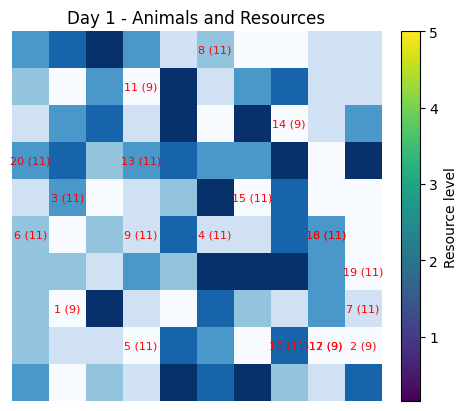

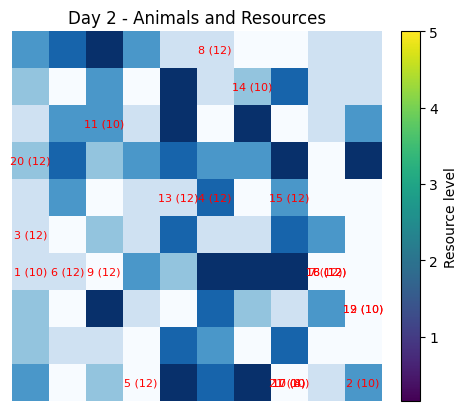

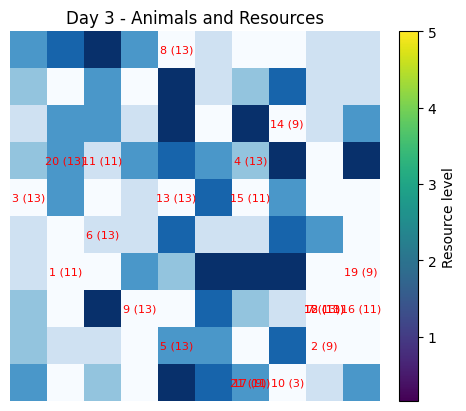

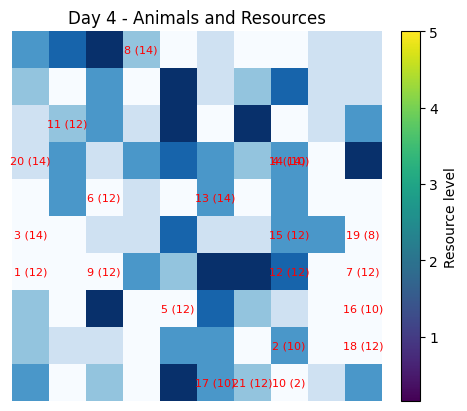

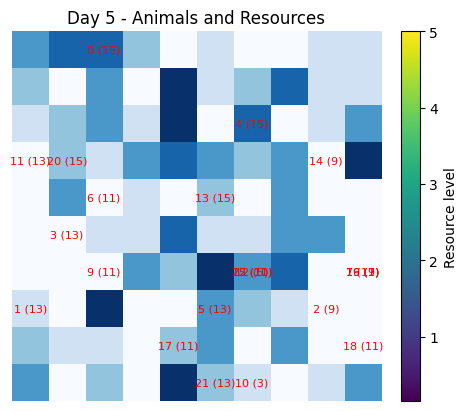

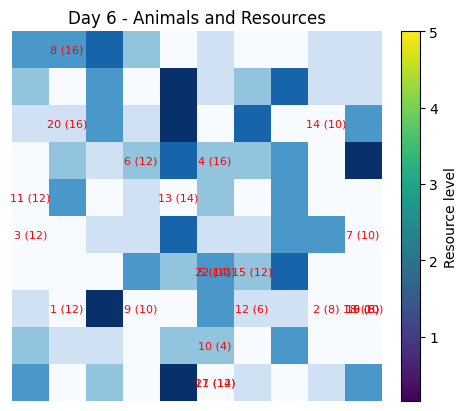

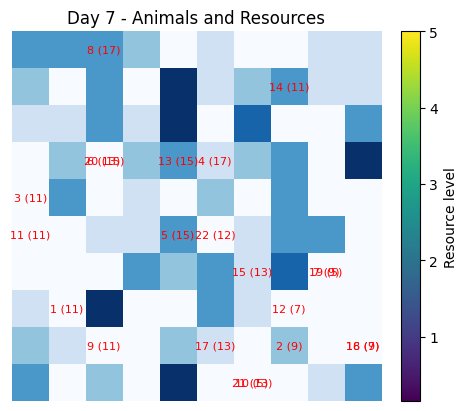

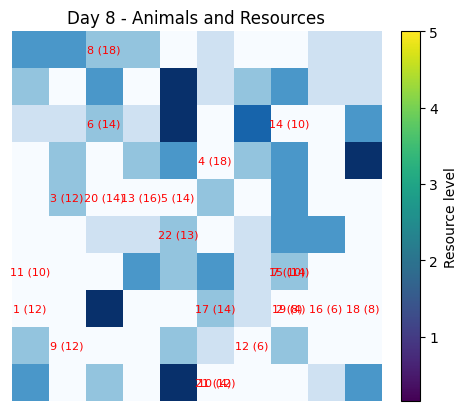

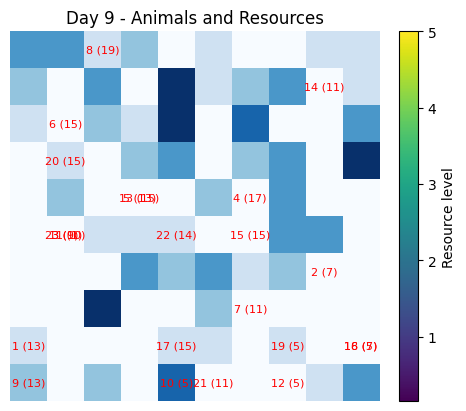

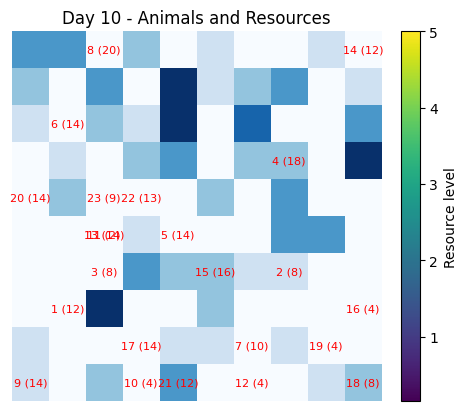

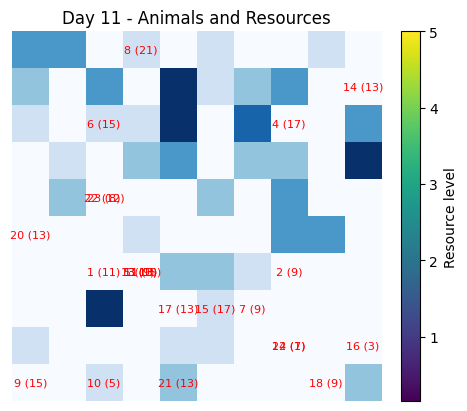

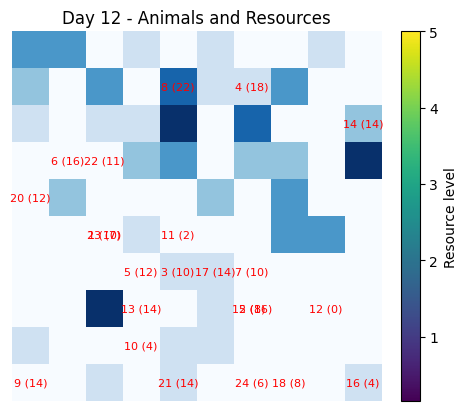

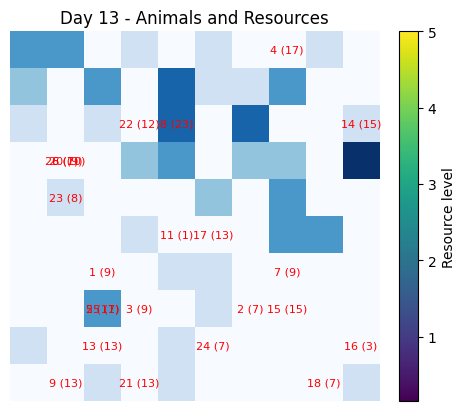

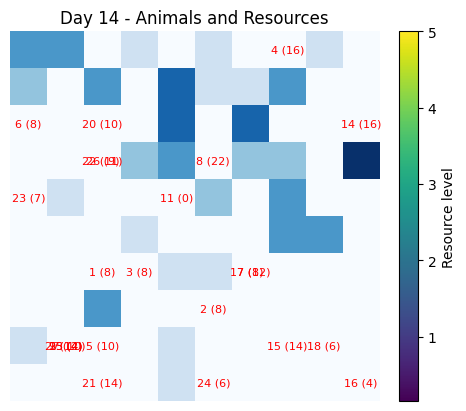

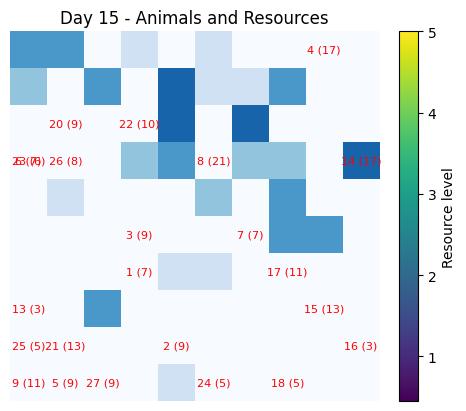

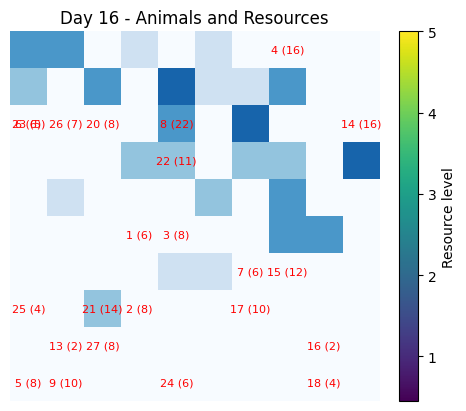

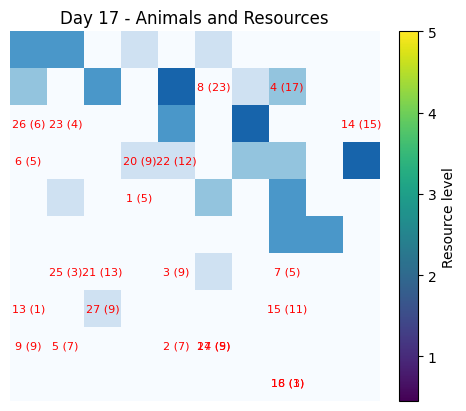

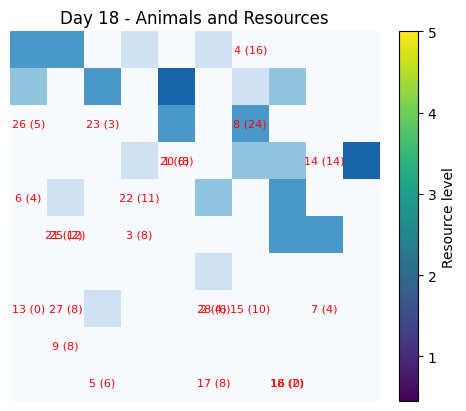

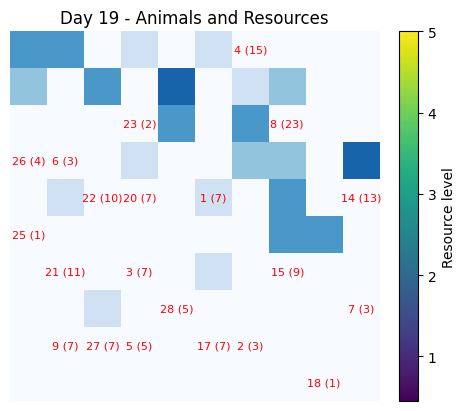

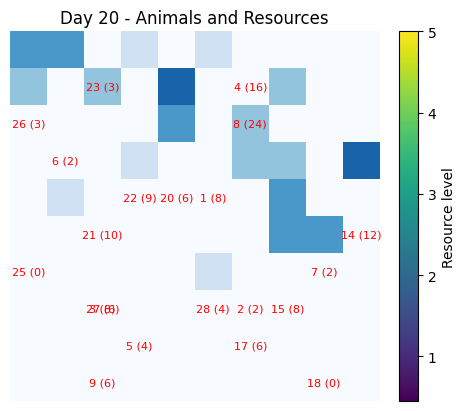

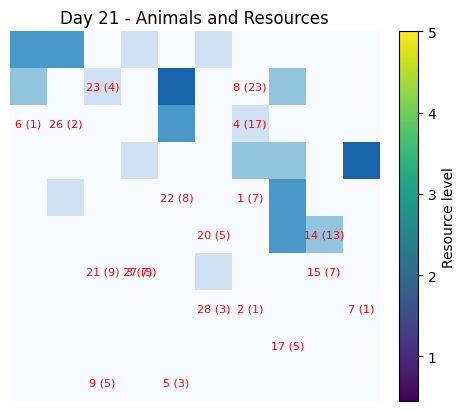

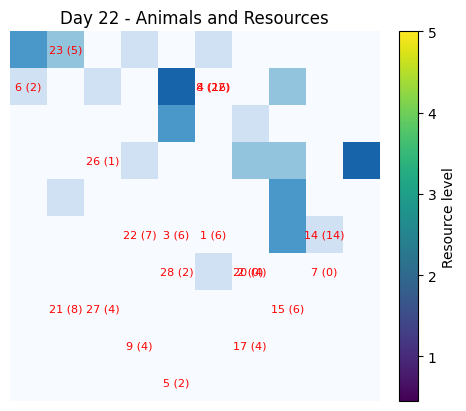

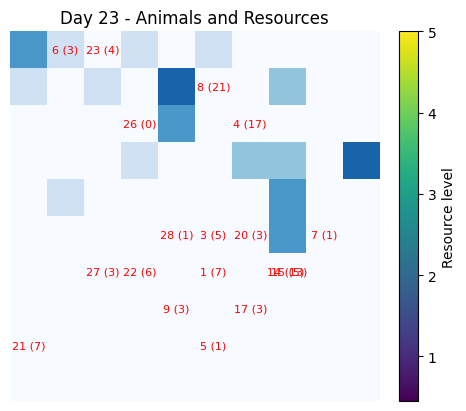

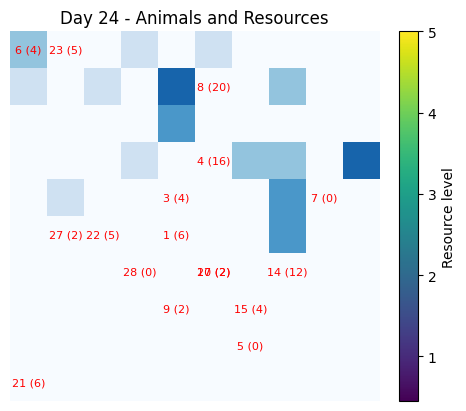

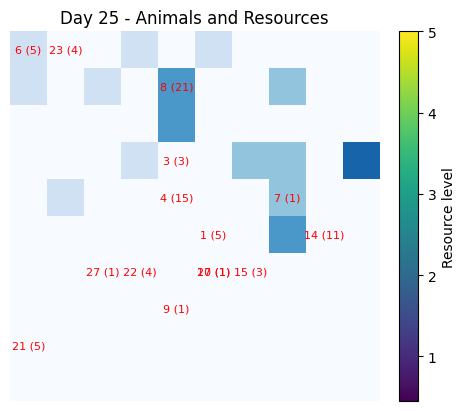

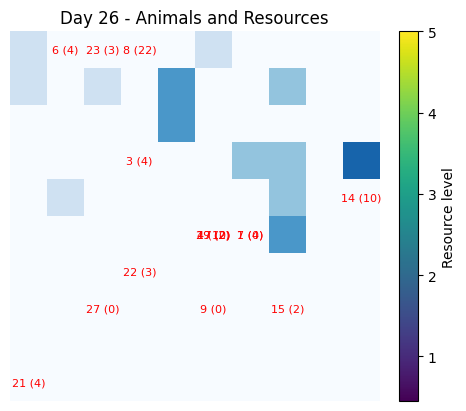

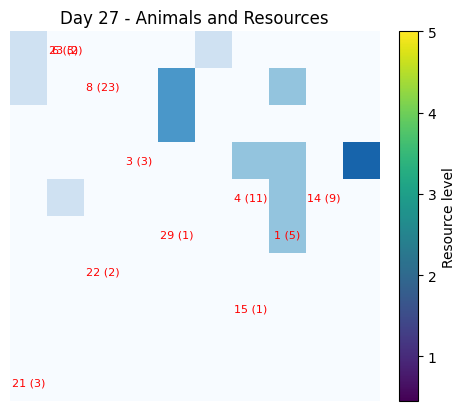

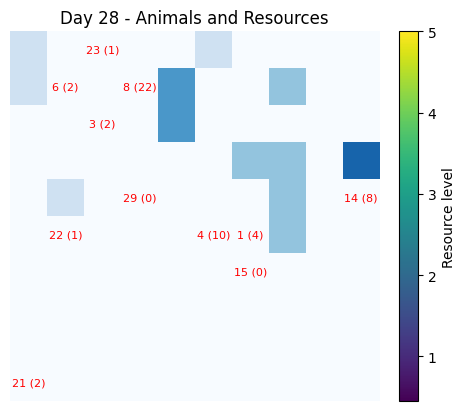

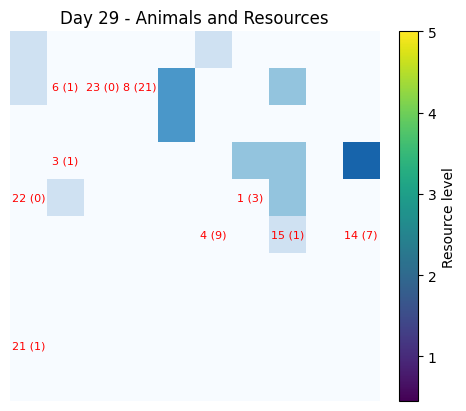

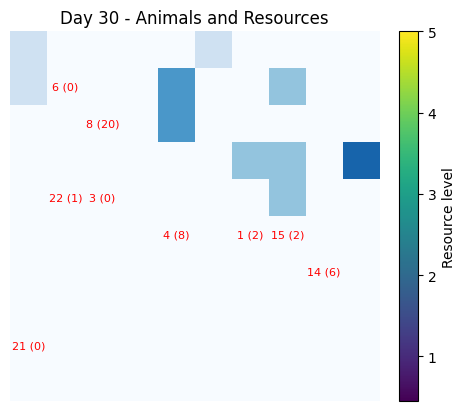

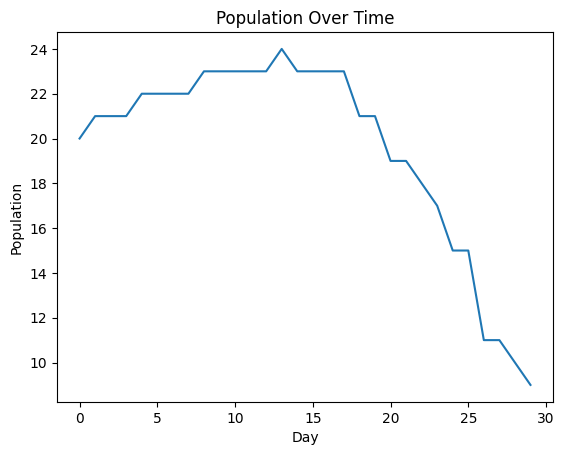

In [56]:
# https://chat.openai.com/c/9951c8aa-e2f2-4c2c-bb1c-c8e7edcc4b14
import numpy as np
import matplotlib.pyplot as plt
import random

class GameOfLife:
    def __init__(self, grid_size, num_animals, initial_resources=10, max_resource=5):
        self.grid_size = grid_size
        self.map = np.random.randint(0, max_resource + 1, (grid_size, grid_size))
        self.animals = {i+1: {'pos': tuple(np.random.randint(0, self.grid_size, 2)), 'resources': initial_resources}
                        for i in range(num_animals)}
        self.history = []
        self.max_resource = max_resource
        self.next_animal_id = num_animals + 1

    def move_animals(self):
        new_animals = {}
        for animal_id, info in list(self.animals.items()):
            x, y = info['pos']
            dx, dy = np.random.randint(-1, 2), np.random.randint(-1, 2)
            new_x = max(0, min(self.grid_size - 1, x + dx))
            new_y = max(0, min(self.grid_size - 1, y + dy))
            new_pos = (new_x, new_y)

            if self.map[new_pos] > 0:
                self.map[new_pos] -= 1
                info['resources'] += 1
            else:
                if info['resources'] > 0:
                    info['resources'] -= 1
                else:
                    continue

            if new_pos not in new_animals:
                new_animals[new_pos] = []
            new_animals[new_pos].append({'id': animal_id, 'resources': info['resources']})

        self.animals = {}
        for pos, animals in new_animals.items():
            for animal in animals:
                self.animals[animal['id']] = {'pos': pos, 'resources': animal['resources']}

    def reproduce_animals(self):
        position_count = {}
        for animal_id, info in self.animals.items():
            if info['pos'] not in position_count:
                position_count[info['pos']] = []
            position_count[info['pos']].append(animal_id)

        for pos, ids in position_count.items():
            if len(ids) > 1 and np.random.random() < 0.25:  # 25% chance to reproduce
                if len(ids) >= 2:
                    chosen_ids = random.sample(ids, 2)
                    mother, father = chosen_ids[0], chosen_ids[1]
                    mother_resources = self.animals[mother]['resources']
                    father_resources = self.animals[father]['resources']

                    # Determine resource contribution
                    if random.random() < 0.5:
                        mother_contribution = min(8, mother_resources)
                        father_contribution = min(2, father_resources)
                    else:
                        mother_contribution = min(2, mother_resources)
                        father_contribution = min(8, father_resources)

                    child_resources = mother_contribution + father_contribution
                    if child_resources > 0:
                        new_animal_id = self.next_animal_id
                        self.next_animal_id += 1
                        self.animals[new_animal_id] = {'pos': pos, 'resources': child_resources}
                        self.animals[mother]['resources'] -= mother_contribution
                        self.animals[father]['resources'] -= father_contribution
                        if self.animals[mother]['resources'] == 0:
                            del self.animals[mother]  # Mother dies if no resources left
                        if self.animals[father]['resources'] == 0:
                            del self.animals[father]  # Father dies if no resources left

    def update(self):
        self.move_animals()
        self.reproduce_animals()
        self.history.append(len(self.animals))

    def plot_map(self, day):
        fig, ax = plt.subplots()
        resource_colors = plt.cm.Blues(np.linspace(0, 1, self.max_resource + 1))  # Reversed blue to white
        resource_map = resource_colors[self.map]
        cax = ax.imshow(resource_map, origin='upper', interpolation='none')
        colorbar = plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04, ticks=np.linspace(0, 1, self.max_resource + 1))
        colorbar.set_label('Resource level')
        colorbar.ax.set_yticklabels([f"{i}" for i in range(self.max_resource + 1)])

        for animal_id, info in self.animals.items():
            ax.text(info['pos'][1], info['pos'][0], f'{animal_id} ({info["resources"]})', color='red', ha='center', va='center', fontsize=8)

        ax.set_title(f'Day {day} - Animals and Resources')
        plt.axis('off')
        plt.show()

    def plot_history(self):
        plt.figure()
        plt.plot(self.history)
        plt.title('Population Over Time')
        plt.xlabel('Day')
        plt.ylabel('Population')
        plt.show()

    def run(self, days):
        for day in range(1, days + 1):
            self.update()
            # if day % 5 == 0 or day == 1:
            self.plot_map(day)
        self.plot_history()

# Setup parameters
grid_size = 10
num_animals = 20
days = 30

# Create game instance and run it
game = GameOfLife(grid_size, num_animals)
game.run(days)
